In [1]:
import json
import os
import math
import librosa
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

C:\Users\mikes\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
audio_dir = "./Data/genres_original"

In [3]:
def get_mfcc(file_path, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path, sr=sample_rate)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length).T
    mfcc_mean = np.mean(mfcc, axis=0)
    feature_vector = np.array(mfcc_mean)
    return feature_vector


def process_data(dataset_path):
    X = []
    y = []

    for folder in os.listdir(dataset_path):
        print("Processing: " + folder)  
        for file in os.listdir(dataset_path+ "/" + folder):
            file_path = dataset_path + "/" + folder + "/" + file
            feature_vector = get_mfcc(file_path)
            X.append(feature_vector)
            y.append(folder)
                  
    return np.array(X), np.array(y)    

In [4]:
# process data
X, y = process_data(audio_dir)

Processing: blues
Processing: classical
Processing: country
Processing: disco
Processing: hiphop
Processing: jazz
Processing: metal
Processing: pop
Processing: reggae
Processing: rock


In [10]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# train the KNN model
# testing at different k values
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

best_accuracy = 0
best_k = 0
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("k =", k, "Accuracy:", accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print("Best k value (number of neighbors) for our model is:", best_k)
print("Best accuracy our model gives is:", best_accuracy)

k = 1 Accuracy: 0.51
k = 2 Accuracy: 0.51
k = 3 Accuracy: 0.54
k = 4 Accuracy: 0.54
k = 5 Accuracy: 0.5533333333333333
k = 6 Accuracy: 0.5533333333333333
k = 7 Accuracy: 0.5766666666666667
k = 8 Accuracy: 0.5733333333333334
k = 9 Accuracy: 0.5866666666666667
k = 10 Accuracy: 0.58
k = 11 Accuracy: 0.5766666666666667
k = 12 Accuracy: 0.59
k = 13 Accuracy: 0.5766666666666667
k = 14 Accuracy: 0.58
k = 15 Accuracy: 0.59
k = 16 Accuracy: 0.59
k = 17 Accuracy: 0.5833333333333334
k = 18 Accuracy: 0.57
k = 19 Accuracy: 0.5733333333333334
k = 20 Accuracy: 0.5666666666666667
k = 21 Accuracy: 0.5733333333333334
k = 22 Accuracy: 0.58
k = 23 Accuracy: 0.58
k = 24 Accuracy: 0.5866666666666667
k = 25 Accuracy: 0.5733333333333334
k = 26 Accuracy: 0.5633333333333334
k = 27 Accuracy: 0.5733333333333334
k = 28 Accuracy: 0.5766666666666667
k = 29 Accuracy: 0.5733333333333334
Best k value (number of neighbors) for our model is: 12
Best accuracy our model gives is: 0.59


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
categories = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
conf_matrix = confusion_matrix(y_test, y_pred)

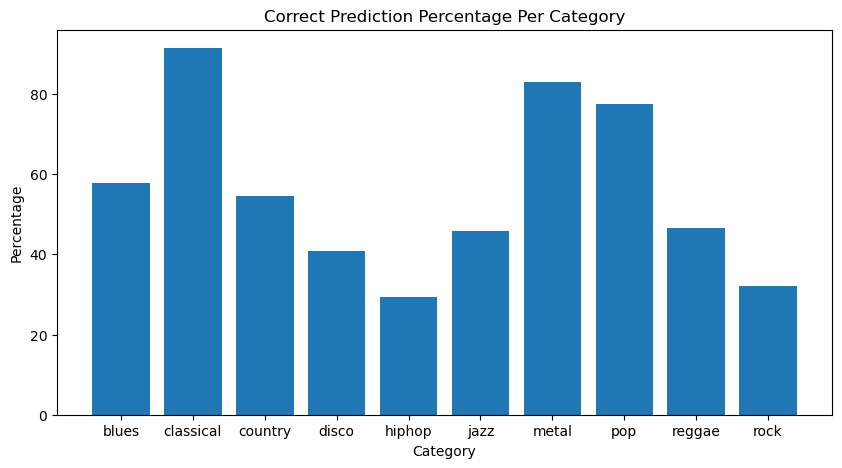

In [13]:
correct_per_category = np.diag(conf_matrix)
total_per_category = np.sum(conf_matrix, axis=1)
correct_percentage_per_category = 100 * correct_per_category / total_per_category
plt.figure(figsize=(10,5))
plt.bar(categories, correct_percentage_per_category)
plt.title('Correct Prediction Percentage Per Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

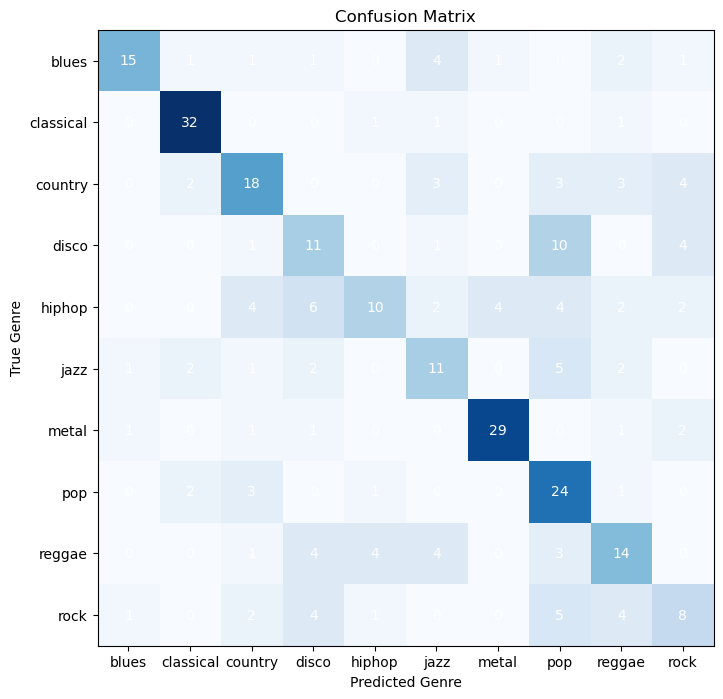

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Genre')
ax.set_ylabel('True Genre')
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.grid(False)
for i in range(len(categories)):
    for j in range(len(categories)):
        ax.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='white')
plt.show()